<a href="https://colab.research.google.com/github/mohamedashraf111999/ML/blob/master/Linear_Regression_Model_with_Pyhtorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import torch
from torch import nn

In [64]:
# create some data
weights = 0.7
bais = 0.3
start  = 0
end = 2
step = 0.01
#create data
X_regression = torch.arange(start , end, step).unsqueeze(dim = 1)
y_regression = weights * X_regression + bais


#cheching the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

200


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [65]:
#creating train, test data split

train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], X_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], X_regression[train_split:]

#checking the len of the data
len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(160, 160, 40, 40)

In [54]:
### Download helper_functions if it is not dowloaded
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("Helper_funcation is exist")
else:
  print("Downloading Helper Functions")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

Helper_funcation is exist


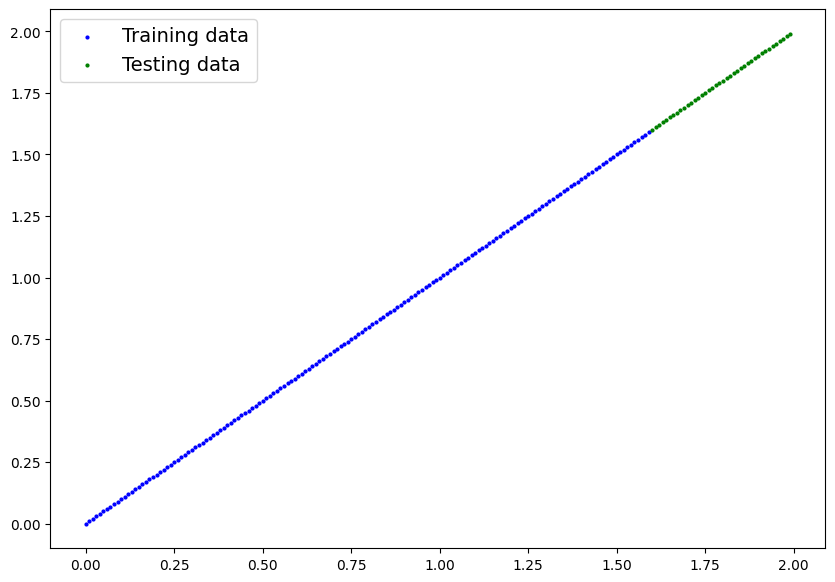

In [66]:
from helper_functions import plot_predictions
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression)

In [67]:
#Device Agnostic
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [76]:
#Intializing the model and its layers + Adding it to same device

model_v2 = nn.Sequential(
    nn.Linear(in_features = 1, out_features =10),
    nn.Linear(in_features = 10, out_features = 10),

    nn.Linear(in_features = 10, out_features = 1),
).to(device)

In [ ]:
#Intialize the model with class
"""
class CircleModelV2(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)

    #Creating Linear layer that take 2 input feature and produce 1 output
    self.linear_layer1 = nn.Linear(in_features=2, out_features=10)  #This layer takes 2 inputs and produce 5 outputs
    self.linear_layer2 = nn.Linear(in_features=10, out_features=10)
    self.linear_layer3 = nn.Linear(in_features=10, out_features=1)  #This layer takes 5 inputs (Same outputs of the previous Layer)

  #defining forward() Method
  def forward(self, x):
    return self.linear_layer3(self.linear_layer2(self.linear_layer1(x)))

"""

In [77]:
#Intializing Loss Funcation and Optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_v2.parameters(), lr = 0.1)

In [78]:
#Creating accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [79]:
#Model Training Loop

Epochs = 5000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(Epochs):

  model_v2.train()
  y_pred = model_v2(X_train_regression)
  #calculating the loss
  loss = loss_fn(y_pred, y_train_regression)
  # Zero Grad
  optimizer.zero_grad()

  #Loss backward
  loss.backward()

  #Optimizer step

  optimizer.step()

  ### Testing

  model_v2.eval()

  with torch.inference_mode():
    test_logits = model_v2(X_test_regression).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss  = loss_fn(test_logits, y_test_regression)
    test_acc = accuracy_fn(y_true=y_test_regression, y_pred=test_preds)


  if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}| Test loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.35886| Test loss: 0.18646
Epoch: 100 | Loss: 0.15897| Test loss: 0.64746
Epoch: 200 | Loss: 0.05220| Test loss: 0.20560
Epoch: 300 | Loss: 0.03770| Test loss: 0.24483
Epoch: 400 | Loss: 0.13755| Test loss: 0.19144
Epoch: 500 | Loss: 0.05240| Test loss: 0.25469
Epoch: 600 | Loss: 0.01085| Test loss: 0.31155
Epoch: 700 | Loss: 0.09639| Test loss: 0.12884
Epoch: 800 | Loss: 0.12465| Test loss: 0.18909
Epoch: 900 | Loss: 0.06486| Test loss: 0.20542
Epoch: 1000 | Loss: 0.06723| Test loss: 0.15797
Epoch: 1100 | Loss: 0.06161| Test loss: 0.20047
Epoch: 1200 | Loss: 0.05972| Test loss: 0.18217
Epoch: 1300 | Loss: 0.03757| Test loss: 0.20035
Epoch: 1400 | Loss: 0.08210| Test loss: 0.12802
Epoch: 1500 | Loss: 0.03227| Test loss: 0.20744
Epoch: 1600 | Loss: 0.06454| Test loss: 0.14584
Epoch: 1700 | Loss: 0.05292| Test loss: 0.16466
Epoch: 1800 | Loss: 0.06927| Test loss: 0.13080
Epoch: 1900 | Loss: 0.07514| Test loss: 0.16027
Epoch: 2000 | Loss: 0.10025| Test loss: 0.13137
Epoc

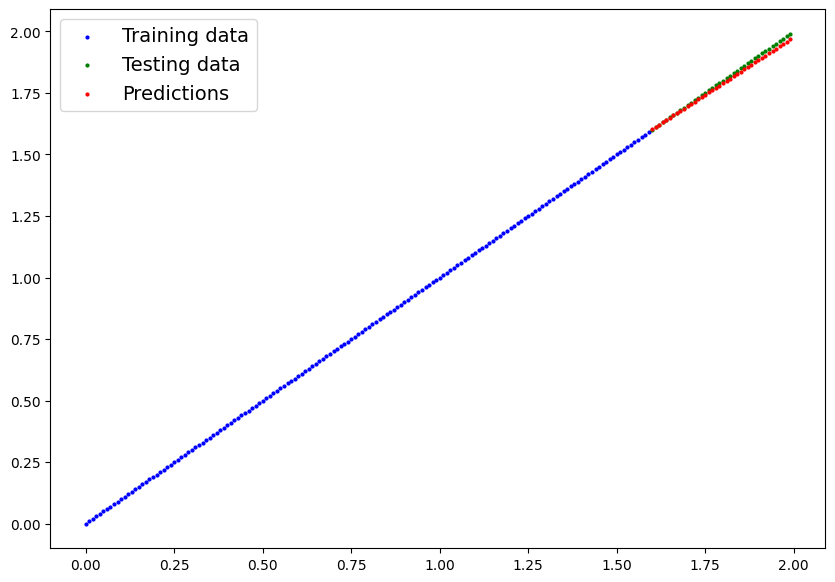

In [80]:
model_v2.eval()

with torch.inference_mode():
  y_preds = model_v2(X_test_regression)

plot_predictions(train_data = X_train_regression.cpu(),
                 train_labels = y_train_regression.cpu(),
                 test_data = X_test_regression.cpu(),
                 test_labels = y_test_regression.cpu(),
                  predictions = y_preds.cpu())